### План исследования
1. Провести анализ предметной области: как и сколько тонул Титаник, посмотреть схему расположения кают, места расположения шлюпок и т.д. Задача: определить признаки, которые могли бы повлиять на возможность спасения человека
2. Начать формировать pipeline
3. Посмотртеть на данные и одбросить признаки, которые заведомо не могут влиять на возможность выживания
4. Посмотреть на оставшиеся столбцы, найти в них отсутсвующие значения и решить, что с ними делать
5. Привести категориальные признаки к векторному виду
6. Отмаштабировать количественные признаки
7. Определить набор методов, которые будем использовать для кластеризации
8. Определить метрики качества обучения
9. Разбить выборку на train и test
10. Использовать сетку для подбора параметров и кросс-валидацию для обучения методов
11. Выбрать наилучший метод 

In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as smt
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, MinMaxScaler,  LabelBinarizer, OneHotEncoder
plt.style.use('ggplot')
%matplotlib inline

In [595]:
df = pd.read_csv('train.csv', na_values='NaN')

In [596]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Изучение предметной области
Итак, Титаник утонул в ночь с 14 на 15 апреля 1912 года. Корабль брал на борт пассажиров в Саутгемптоне, Шербура и в Квинстауне. На корабле было 7 палуб, на которых располагались каюты 3 классов. Шлюпочная палуба была над палубой A (см. рисунок). Столкновение с айсбергом произошло в 23:40, а в 2:20 Титаник полностью скрылся под водой. 
https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D1%83%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%C2%AB%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA%D0%B0%C2%BB

Наша задача определить какие признаки могут помочь спрогнозировать выживание человека.<br>
<b>Признак №1: PassengerId</b> – Порядковый номер пассажира. На возможность выживания не влияет<br>
<b>Признак №2: Pclass</b> – класс каюты. Если учесть, что каюты первого класса находились в непосредственной близости от шлюпочной палубы, а каюты 3 класса в основном располагались на палубе F, т.е. в самом низу, то, скорее всего, вероятность спасения пассажира 1 класса выше, чем у пассажира 3 класса. Признак необходим.<br>
<b>Признак №3: Name</b>. Так как при эвакуации была паника, то имя вряд ли могло как-то повлиять на возможность выживания. Можно использовать для определения возраста (при его отсутствии). <br>
<b>Признак №4 и 5. Sex, Age</b> В описании эвакуации говорится, что первых в спасательные шлюпки сажали женщин и детей, т.е. пол и возраст может помочь в предсказании выжил человек или нет.<br>
<b>Признак №6 SibSp</b> - кол-во братьев/сестер или супруга/супруги на корабле. Плохо, что наличие супруга/супруги на корабле перемешано с кол-во братьев/сестер. Можно попытаться разделить этих людей. Для чего это может понадобится? В столбце Age есть 177 пропущенных значений (около 20%). Хотелось бы заменить NaN не просто на среднее значений, а на что-то более осмысленное. <br>
<b>Признак №7 Parch</b> – кол-во родителей/детей на борту. Возможно понадобится для определения возраста, если возраст не указан.<br>
<b>Признак №8 Ticket</b> – номер билета. Сам по себе номер билета ни о чем не говорит, но для разделения признака №6 пригодится.<br>
<b>Признак №9 Fare</b> – цена за билет. Так как ценообразование в данном случае не очень понятно (не дорогие билеты есть и в 1 и во 2 и в 3 классах + есть очень дорогие билеты в первом классе – больше 500), а напрямую этот фактор на выживаемость не влияет (надо проверить), то скорее всего признак можно отбросить.<br>
<b>Признак №10 Cabin</b> – номер каюты. Здесь очень много пропусков! Судя по названию каюты, первая буква в названии – это палуба, т.е., в принципе, по номеру каюты можно было бы определить близость к шлюпочной палубе. Но, так как очень много пропусков и как восстановить эти значения не очень понятно, то признак можно отбросить. <br>
<b>Признак №11 Embarked</b> – город, где человек зашел на борт. На возможность спасения не влияет, признак отбрасываем. <br>
Таким образом, для отбора признаков необходимо сделать следующие шаги: <br>
1.	Отбросить признаки: PassengerId, Cabin, Embarked<br>
2.	Проверить наличие корреляции между ценой билета и спасением<br>
3.	Попытаться разделить признак №6 SibSp на два: 1) кол-во братьев/сестер - Sib; 2) наличие супруга/супруги - Sp. Для этого: <br>
3.1. Если SibSp>=2, это означает, что это кол-во братьев или сестер (официального многоженства в 1912 г. в Англии, как мне кажется, не было). Есть правда еще вариант, что едут семейная пара + братья/сестра мужа/жены, но я думаю таких случаев не очень много<br>
3.2. Если (SibSp ==1) и (пол=Ж) и (в имени есть Miss), то это незамужняя женщина и SibSp – это кол-во братьев/сестер<br>
3.3. Если (SibSp ==1) и (пол=Ж) и (в имени есть Mrs), то: <br>
•	взять фамилию (часть имени до первой запятой) <br>
•	найти в списке пассажиров мужчину с такой же фамилией и SibSp ==1. Если такой пассажир есть, то SibSp – это кол-во мужей, если нет, то SibSp – это братья/сестра<br>
3.4. Если (SibSp ==1) и (пол=М) и (в имени есть Mr), то: <br>
•	взять фамилию (часть имени до первой запятой) <br>
•	найти в списке пассажиров женщину с такой же фамилией и обращение Mrs и SibSp ==1. Если такая пассажирка есть, то SibSp – это кол-во жен, если нет, то SibSp – это братья/сестра<br>

4.	Попытаться восстановить возраст. Для этого: <br>
4.1. Если, полученный ранее признак, Sib != 0, то: <br>
•	взять фамилию и найти пассажиров с такой же фамилией и таким же значением Sib. Если у кого-то из найденных пассажиров возраст определен, то у данного пассажира установить средний возраст среди своих братьев/сестер. Если ни у кого из найденных людей возраст не определен, установить значение возраста у данного пассажира = 8. (Средний возраст детей df.loc[df.Age<=16]['Age'].mean()). Если братьев/сестер найти не удалось, то Age = 29 (средний возраст всех пассажиров) <br>
4.2.Если, полученный ранее признак, Sp != 0, то найти мужа/жену и установить данному пассажиру его/ее возраст. Если муж/жена не найдены, установить Age = 29 (средний возраст всех пассажиров) <br>


Палуба A: проходила не по всей длине судна (то есть не доходила от кормы до носа судна), предназначена для пассажиров I класса<br>
Палуба B: проходила не по всей длине судна (прерывалась на 37 метров над палубой C, спереди служила место для якорей)<br>
Палуба C: в передней части камбуз, столовая для экипажа, а также прогулочная зона для пассажиров III класса<br>
Палуба D: прогулочная зона для пассажиров<br>
Палуба E: каюты пассажиров I, II классов<br>
Палуба F: часть кают пассажиров II класса, большая часть кают III класса<br>
Палуба G: проходила не по всей длине судна, в центре располагались котельные.<br>
Подробнее: http://cyclowiki.org/wiki/%D0%9F%D0%B0%D0%BB%D1%83%D0%B1%D1%8B_%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA%D0%B0

<img src='http://data.cyclowiki.org/images/3/38/Titanic_palyb.jpeg'>

#### 1. Отбросить признаки: PassengerId, Cabin, Embarked

In [634]:
def drop_columns(df):
    return df.drop(labels = ['PassengerId', 'Embarked', 'Cabin'], axis=1)

#### 2. Проверить наличие корреляции между ценой билета и спасением

In [626]:
np.corrcoef(df.Fare, df.Survived)

array([[ 1.        ,  0.25730652],
       [ 0.25730652,  1.        ]])

Как и ожидалось корреляции нет => отбрасываем признак, добавляя столбец 'Fare' в предыдущую функцию

#### 3. Пытаемся разделить признак №6 SibSp на два: 1) кол-во братьев/сестер - Sib; 2) наличие супруга/супруги - Sp

In [627]:
def split_sibsp(df):   
    Sib = np.zeros(len(df.SibSp))
    Sp = np.zeros(len(df.SibSp))
    for passenger in df.iterrows():    
        if passenger[1]['SibSp']>=2: 
            Sib[passenger[0]]=passenger[1]['SibSp']
            continue

        if (passenger[1]['SibSp']==1) and (passenger[1]['Sex']=='female') and (passenger[1]['Name'].find('Miss')!=-1):
            Sib[passenger[0]]=1
            continue        

        if (passenger[1]['SibSp']==1) and (passenger[1]['Sex']=='female') and (passenger[1]['Name'].find('Mrs')!=-1):
            surname = passenger[1]['Name'].split(',')[0]
            Find = False
            for pas in df.iterrows():
                if (pas[1]['Name'].startswith(surname + ',')) and (pas[1]['SibSp']==1) and \
                   (pas[1]['Name'].find('Mr')!=-1) and (pas[1]['Ticket']==passenger[1]['Ticket']):
                    Sp[passenger[0]] = 1
                    Find = True
                    break
            if Find is not True: Sib[passenger[0]] = 1
            continue

        if (passenger[1]['SibSp']==1) and (passenger[1]['Sex']=='male') and (passenger[1]['Name'].find('Mr')!=-1):
            surname = passenger[1]['Name'].split(',')[0]
            Find = False
            for pas in df.iterrows():
                if (pas[1]['Name'].startswith(surname + ',')) and (pas[1]['SibSp']==1) and \
                   (pas[1]['Name'].find('Mrs')!=-1) and (pas[1]['Ticket']==passenger[1]['Ticket']):
                    Sp[passenger[0]] = 1
                    Find = True
                    break
            if Find is not True: Sib[passenger[0]] = 1   
            continue

    df['Sib'] = Sib
    df['Sp'] = Sp
    return df

#### 4. Пытаемся восстановить возраст

In [628]:
def set_age(df1):
    child_mean = int(df1.loc[df.Age<=16]['Age'].mean())
    adult_mean = int(df1.loc[df.Age>16]['Age'].mean())

    for passenger in df1.loc[pd.isnull(df['Age'])].iterrows():
        surname = passenger[1]['Name'].split(',')[0]    
        if passenger[1]['Sib']>0:     
            namesakes_age = []
            for pas in df1.iterrows():         
                if (pas[1]['Name'].startswith(surname + ',')) and \
                   (pas[1]['Sib']==passenger[1]['Sib']) and \
                   (pas[1]['Ticket']==passenger[1]['Ticket']) and \
                   (pd.isnull(pas[1]['Age']) is not True): 
                        namesakes_age.append(pas[1]['Age'])

            if len(namesakes_age)>0: df1.set_value(passenger[0],'Age', int(np.array(namesakes_age).mean())) 
            else: df1.set_value(passenger[0],'Age', child_mean)

        if passenger[1]['Sp']>0:
            for pas in df1.iterrows(): 
                if (pas[1]['Name'].startswith(surname + ',')) and (pas[1]['Sp']==passenger[1]['Sp']) and \
                   (pas[1]['Ticket']==passenger[1]['Ticket']) and (isinstance(pas[1]['Age'], float)):
                        df1.set_value(passenger[0],'Age', pas[1]['Age'])
                else: df1.set_value(passenger[0],'Age', adult_mean)

        if passenger[1]['Sp']==0 and passenger[1]['Sib']==0: df1.set_value(passenger[0],'Age', adult_mean)
    return df1

In [629]:
def drop_columns2(df):
    return df.drop(labels = ['Name', 'Ticket', 'Parch', 'SibSp', 'Sib', 'Sp'], axis=1)
    #return df.drop(labels = ['Name', 'Ticket', 'Parch', 'SibSp'], axis=1)

In [630]:
def get_pclass_sex(df):
    pclass = pd.get_dummies(df['Pclass'])
    pclass.rename(columns={1: 'class_1', 2: 'class_2', 3: 'class_3'}, inplace=True)
    sex = pd.get_dummies(df['Sex'])
    df = df.drop(labels = ['Pclass', 'Sex'], axis=1)
    # = df.drop(labels = ['Sex'], axis=1)
    #return pd.concat((sex, df),axis=1)
    return pd.concat((pclass, sex, df),axis=1)

In [727]:
def scaler_age_fare(df):
    #df.dropna(axis=0)
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    scaler1 = StandardScaler()
    scaler2 = MinMaxScaler()
    fare = scaler1.fit_transform(df['Fare'].values.reshape(-1, 1))
    age = scaler2.fit_transform(df['Age'].values.reshape(-1, 1))
    df['Fare'] = fare
    df['Age'] = age
    return df

In [730]:
def mean_age(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    return df

In [648]:
pipeline = make_pipeline(FunctionTransformer(drop_columns, validate=False), \
                         FunctionTransformer(split_sibsp, validate=False), \
                         FunctionTransformer(set_age, validate=False), \
                         FunctionTransformer(drop_columns2, validate=False), \
                         FunctionTransformer(get_pclass_sex, validate=False), \
                         FunctionTransformer(scaler_age_fare, validate=False))

In [649]:
dff = pipeline.fit_transform(df)
dff

,class_1,class_2,class_3,female,male,Survived,Age,Fare
0,0,0,1,0,1,0,0.271174,-0.502445
1,1,0,0,1,0,1,0.472229,0.786845
2,0,0,1,1,0,1,0.321438,-0.488854
3,1,0,0,1,0,1,0.434531,0.420730
4,0,0,1,0,1,0,0.434531,-0.486337
5,0,0,1,0,1,0,0.409399,-0.478116
6,1,0,0,0,1,0,0.673285,0.395814
7,0,0,1,0,1,0,0.019854,-0.224083
8,0,0,1,1,0,1,0.334004,-0.424256
9,0,1,0,1,0,1,0.170646,-0.042956


In [650]:
y = dff.Survived
dff.drop(labels = ['Survived'], axis=1, inplace = True)
#df1['Survived'] = y

In [651]:
X = dff.as_matrix()
X.shape

(891, 7)

In [652]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (623, 7)
X_test.shape: (268, 7)


In [653]:
y_test.sum()/y_train.shape[0]

0.18459069020866772

### Определяем методы, которые будем использовать для кластеризации
1. kNN
2. GMM
3. NN
2. Random Forest

### Определяем метрику качества, которую будем использовать
Так как у нас только два класса и нет явного преобладания одного класса над другим, в качестве метрики качества будем использовать accuracy_score

## 1. kNN

In [654]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [655]:
y_predict = kNN.predict(X_test)
print('Accuracy: ',smt.accuracy_score(y_test, y_predict))

Accuracy:  0.764925373134


## 2. GMM

In [657]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=2).fit(X_train)
yp_gmm = GMM.predict(X_test)
print('Accuracy: ',smt.accuracy_score(y_test, yp_gmm))

Accuracy:  0.361940298507


## 3. Neural Network (MLP)

In [674]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='logistic', max_iter=2000).fit(X_train, y_train)
yp_mlp = MLP.predict(X_test)
#MLP.score(X_train, y_train)
print('Accuracy: ',smt.accuracy_score(y_test, yp_mlp))

Accuracy:  0.761194029851


In [686]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-6, 6, num=10)
gamma_array = np.logspace(-6, 8, num=10)

svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print('CV error    = ', grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.820224719101
best C      =  46415.8883361
best gamma  =  0.0464158883361


In [687]:
svc = SVC(C = grid.best_estimator_.C, gamma = grid.best_estimator_.gamma)
svc.fit(X_train, y_train)
yp_svc = svc.predict(X_test)
print('Accuracy: ',smt.accuracy_score(y_test, yp_svc))

Accuracy:  0.787313432836


## 4. Random Forest

Для случайного леса нормировать признаки не будем

In [731]:
pipeline_rf = make_pipeline(FunctionTransformer(drop_columns, validate=False), \
                         FunctionTransformer(split_sibsp, validate=False), \
                         FunctionTransformer(set_age, validate=False), \
                         FunctionTransformer(drop_columns2, validate=False), \
                         FunctionTransformer(get_pclass_sex, validate=False), \
                         FunctionTransformer(mean_age, validate=False))
dff_rf = pipeline_rf.fit_transform(df)
y_rf = dff_rf.Survived
dff_rf.drop(labels = ['Survived'], axis=1, inplace = True)
X_rf = dff_rf.as_matrix()
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 1)

In [732]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500).fit(X_rf_train, y_rf_train)
yp_rf = RF.predict(X_rf_test)
print('Accuracy: ',smt.accuracy_score(y_rf_test, yp_rf))   

Accuracy:  0.798507462687


In [733]:
RF.feature_importances_

array([ 0.02513569,  0.01624101,  0.05904508,  0.1450314 ,  0.15850861,
        0.29670514,  0.29933307])

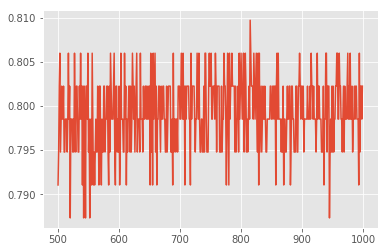

In [740]:
accuracy =[]
n_range = range(500, 1000)
for n in n_range:
    RF = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
    yp_rf = RF.predict(X_test)
    accuracy.append(smt.accuracy_score(y_test, yp_rf))

plt.plot(n_range, accuracy)

In [747]:
n_max = 0
acc_max = 0
for idx, acc in enumerate(accuracy):
    if acc>acc_max: 
        n_max = 500 + idx
        acc_max = acc
        
print(n_max)

815


In [749]:
RF = RandomForestClassifier(n_estimators=n_max).fit(X_train, y_train)
yp_rf = RF.predict(X_test)
print('Accuracy: ',smt.accuracy_score(y_rf_test, yp_rf)) 

Accuracy:  0.80223880597


In [750]:
df_test = pd.read_csv('test.csv', na_values='NaN')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [564]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [716]:
df_test.loc[pd.isnull(df_test.Fare),'Fare'] = df_test.Fare.mean()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [734]:
df_all = pd.concat([df, df_test])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 107.4+ KB


In [735]:
dff_rf_test = pipeline_rf.fit_transform(df_all)
dff_rf_test = dff_rf_test[891:]

In [736]:
dff_rf_test.drop(labels = ['Survived'], axis=1, inplace = True)

In [737]:
dff_rf_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
class_1    418 non-null uint8
class_2    418 non-null uint8
class_3    418 non-null uint8
female     418 non-null uint8
male       418 non-null uint8
Age        418 non-null float64
Fare       418 non-null float64
dtypes: float64(2), uint8(5)
memory usage: 11.8 KB


In [751]:
X_rf_test = dff_rf_test.as_matrix()
yp_rf_test = RF.predict(X_rf_test)   

In [752]:
df_predicted = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': yp_rf_test})
df_predicted.to_csv('sample_submission.csv', sep=',', index=False)

Качеcтво модели низкое. На kaggle всего 0.69377. Модель можно улучшить следующим образом: если помотреть, например, на пассажиров с фамилей McCoy, то видно, что скорее всего это брат и две сестры. При этом 1) их возраст не определен; 2) брат и сестра находятся в обучающей выборке и видно, что они спаслись, а вторая сетра находится в тестовой выборке и, скорее всего, он так же спаслась. Т.е. хочется добавить еще какие-то признаки, чтобы уменьшить расстояние между этими тремя пассажирами. Это можно сделать введя в качестве признкаов фамилию и номер билета. При этом мерой между фамилиями будет 1 или 0 - совпадают фамилии или нет. Между билетами будет такая же мера (номер билета будем рассматривать как строка).<br>

In [726]:
df_all.loc[df_all.Name.str.find('McCoy')!]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
301,NaN,NaN,Q,23.25,"McCoy, Mr. Bernard",0,302,3,male,2,1.0,367226
330,NaN,NaN,Q,23.25,"McCoy, Miss. Agnes",0,331,3,female,2,1.0,367226
127,NaN,NaN,Q,23.25,"McCoy, Miss. Alicia",0,1019,3,female,2,NaN,367226


Определим функцию расстояния:

In [970]:
from scipy.spatial.distance import _validate_vector
def titanic_metric(x,y):
    x = _validate_vector(x)
    y = _validate_vector(y)
    dist = 0
    if x.shape[0] == y.shape[0]:
        l = x.shape[0]
        for i in range(0,l):
            if type(x[i]) == type(y[i]):
                if isinstance(x[i], int) or isinstance(x[i], float): dist += (x[i]-y[i])**2
                if isinstance(x[i], str):
                    if x[i].strip()!=y[i].strip(): dist += 1
            else:
                print ('Тип {} не соответсвует типу {}'.format(type(x[i]), type(y[i])))
                return None
        return np.sqrt(dist)  
    else: 
        print ('Размерности не совпадают {} и {}'.format(x.shape[0], y.shape[0]))
        return None

In [964]:
 def get_surname_drop_columns(df):
    def str_to_num(st):
        #out = ''
        #for i in st: out += str(ord(i))
        #return out
        return st
        
    df['Surname'] = df.Name.map(lambda x: str_to_num(x.split(',')[0].upper()))
    df['Ticket'] = df.Ticket.map(lambda x: str_to_num(x))
    df = df.drop(labels = ['Name', 'Parch', 'SibSp', 'Sp'], axis=1)
    return df

In [965]:
pipeline_new = make_pipeline(FunctionTransformer(drop_columns, validate=False), \
                         FunctionTransformer(split_sibsp, validate=False), \
                         FunctionTransformer(set_age, validate=False), \
                         FunctionTransformer(get_surname_drop_columns, validate=False), \
                         FunctionTransformer(get_pclass_sex, validate=False), \
                         FunctionTransformer(scaler_age_fare, validate=False))

In [966]:
dff_new = pipeline_new.fit_transform(df)

In [967]:
dff_new[330:331]

,class_1,class_2,class_3,female,male,Survived,Age,Ticket,Fare,Sib,Surname
330,0,0,1,1,0,1,0.09525,367226,-0.18029,2.0,MCCOY


In [968]:
dff_new[301:302]

,class_1,class_2,class_3,female,male,Survived,Age,Ticket,Fare,Sib,Surname
301,0,0,1,0,1,1,0.09525,367226,-0.18029,2.0,MCCOY


In [971]:
titanic_metric(dff_new[330:331].values, dff_new[301:302].values)

1.4142135623730951

In [972]:
dff_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
class_1     891 non-null uint8
class_2     891 non-null uint8
class_3     891 non-null uint8
female      891 non-null uint8
male        891 non-null uint8
Survived    891 non-null int64
Age         891 non-null float64
Ticket      891 non-null object
Fare        891 non-null float64
Sib         891 non-null float64
Surname     891 non-null object
dtypes: float64(3), int64(1), object(2), uint8(5)
memory usage: 39.2+ KB


In [973]:
y = dff_new.Survived
dff_new.drop(labels = ['Survived'], axis=1, inplace = True)
X = dff_new.values
print('X.shape =', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)

X.shape = (891, 10)
X_train.shape = (623, 10)
X_test.shape = (268, 10)


In [976]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=4, metric=titanic_metric, algorithm='brute').fit(X_train, y_train)
y_predict = kNN.predict(X_test)
print('Accuracy: ',smt.accuracy_score(y_test, y_predict))

ValueError: could not convert string to float: 'CANN'

Я так понимаю, KNeighborsClassifier даже при использовании пользовательской метрики переводит все компоненты вектора в float  :( Наверно можно написать свой класс со своими fit и predict. Но на это уже времени совсем нет 